In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

In [2]:
def malanchev_dataset(inliers=2**10, outliers=2**5, seed=0):
    rng = np.random.default_rng(seed)
    x = np.concatenate([rng.uniform([0, 0], [0.5, 0.5], (inliers, 2)),
                        rng.normal([1, 1], 0.1, (outliers, 2)),
                        rng.normal([0, 1], 0.1, (outliers, 2)),
                        rng.normal([1, 0], 0.1, (outliers, 2))])
    return x

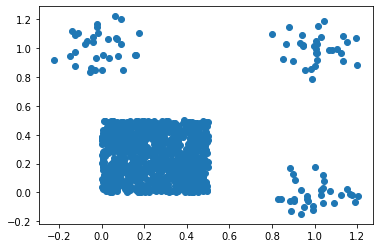

In [3]:
plt.scatter(*malanchev_dataset().T);

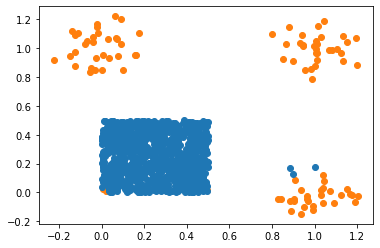

In [38]:
data = malanchev_dataset()
isoforest = IsolationForest(n_estimators=100, max_samples=16)
isoforest.fit(data)
scores = isoforest.score_samples(data)
sorting = np.argsort(scores)

plt.scatter(*data[sorting[:96]].T, color='C1')
plt.scatter(*data[sorting[96:]].T, color='C0')
pass

In [59]:
data = malanchev_dataset(inliers=2**13)

In [60]:
%%time
isoforest = IsolationForest(n_estimators=200, max_samples=1024)
isoforest.fit(data)
pass

CPU times: user 460 ms, sys: 1.02 ms, total: 461 ms
Wall time: 464 ms


In [61]:
%%time
scores = isoforest.score_samples(data)

CPU times: user 523 ms, sys: 1.99 ms, total: 525 ms
Wall time: 526 ms
